<a href="https://colab.research.google.com/github/madhuh1210/sf-intern/blob/main/madhuintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

2. Load Dataset

In [ ]:
df = pd.read_csv("card_transdata.csv")


In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


3. Basic Summary Stats

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


4. Missing Values

In [ ]:
df.isna().sum()


,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
df['fraud'].value_counts()
df['fraud'].value_counts(normalize=True)*100

,proportion
fraud,
0.0,91.2597
1.0,8.7403


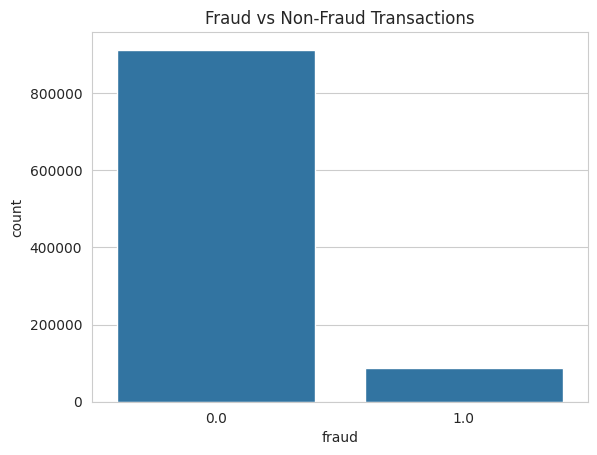

In [ ]:
sns.countplot(x='fraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


5. Distribution of Key Variables

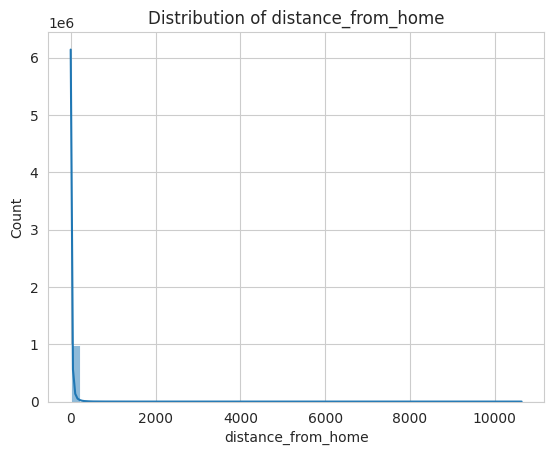

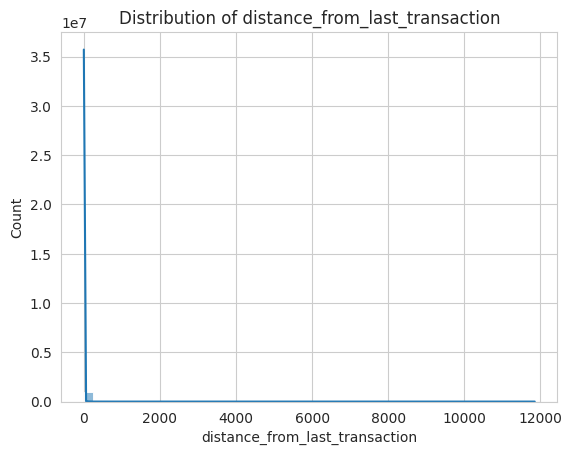

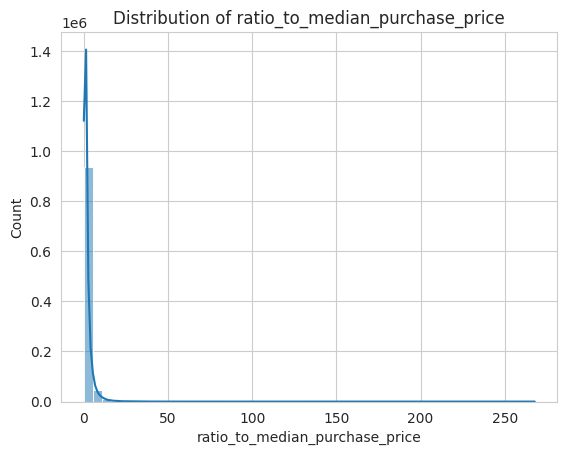

In [ ]:
cont_cols= [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price'
]
for col in cont_cols:
  sns.histplot(df[col], bins=50,kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

In [ ]:
df['distance_from_home'].describe()

,distance_from_home
count,1000000.000000
mean,26.628792
std,65.390784
min,0.004874
25%,3.878008
50%,9.967760
75%,25.743985
max,10632.723672


6. Binning Columns- distance_from_home

In [ ]:
min_dist = df['distance_from_home'].min()
max_dist = df['distance_from_home'].max()


In [ ]:
bins = [
    min_dist, 5, 15, 20, 30, 40, 50, 75, 100, 200, 500, max_dist
]


In [ ]:
df['distance_bin_custom'] = pd.cut(
    df['distance_from_home'],
    bins=bins,
    include_lowest=True
)


In [ ]:
df['distance_bin_custom'].value_counts().sort_index()

,count
distance_bin_custom,
"(0.00387, 5.0]",311210
"(5.0, 15.0]",302865
"(15.0, 20.0]",75578
"(20.0, 30.0]",93678
"(30.0, 40.0]",55607
"(40.0, 50.0]",35738
"(50.0, 75.0]",50231
"(75.0, 100.0]",25304
"(100.0, 200.0]",33508


7. Relationship With Target (fraud)

In [ ]:
df.groupby('distance_bin_custom')['fraud'].agg(['count', 'mean'])


/tmp/ipython-input-3066428873.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('distance_bin_custom')['fraud'].agg(['count', 'mean'])


,count,mean
distance_bin_custom,,
"(0.00387, 5.0]",311210,0.074811
"(5.0, 15.0]",302865,0.065742
"(15.0, 20.0]",75578,0.065032
"(20.0, 30.0]",93678,0.065053
"(30.0, 40.0]",55607,0.066664
"(40.0, 50.0]",35738,0.065896
"(50.0, 75.0]",50231,0.065935
"(75.0, 100.0]",25304,0.064021
"(100.0, 200.0]",33508,0.446968


### Purpose of Analysis

To evaluate whether transactions occurring far from a cardholder’s home location exhibit higher fraud risk.

### Observations

- The feature shows a **right-skewed distribution**, indicating most transactions occur close to home, with a small number occurring at very large distances.
- Fraud rate remains relatively **low and stable** for short and medium distances.
- A **sharp increase in fraud probability** is observed when transaction distance exceeds a high threshold.

### Key Insight

> Transactions occurring unusually far from the cardholder’s home location are significantly more likely to be fraudulent, suggesting geographical deviation as a strong fraud indicator.
>

8) Binning Columns - distance_from_last_transaction

In [ ]:
df['distance_from_last_transaction'].describe()

,distance_from_last_transaction
count,1000000.000000
mean,5.036519
std,25.843093
min,0.000118
25%,0.296671
50%,0.998650
75%,3.355748
max,11851.104565


In [ ]:
bins = [0, 1, 5, 10, 20, 50, 100, np.inf]
labels = ['0–1', '1–5', '5–10', '10–20', '20–50', '50–100', '100+']

df['distance_from_last_transaction_bin'] = pd.cut(
    df['distance_from_last_transaction'],
    bins=bins,
    labels=labels,
    include_lowest=True
)



10.Relationship With Target (fraud)

In [ ]:
df.groupby('distance_from_last_transaction_bin')['fraud'].agg(['count', 'mean'])


/tmp/ipython-input-362599437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('distance_from_last_transaction_bin')['fraud'].agg(['count', 'mean'])


,count,mean
distance_from_last_transaction_bin,,
0–1,500294,0.081904
1–5,314816,0.081308
5–10,84803,0.079679
10–20,52485,0.082176
20–50,32768,0.080566
50–100,9574,0.478588
100+,5260,0.482510


## Distance from Last Transaction (`distance_from_last_transaction`)

### Purpose of Analysis

To examine whether large gaps between consecutive transactions indicate suspicious activity.

### Observations

- Most transactions have a **small distance gap** from the previous transaction.
- Fraud rates remain stable (~8%) for short gaps.
- When the distance from the last transaction becomes **very large**, fraud probability increases dramatically (approaching ~50%).

### Key Insight

> Transactions that occur far away from the previous transaction location show a substantial increase in fraud risk, indicating abnormal transaction sequences.
>

11.Binning Columns- ratio_to_median_purchase_price

In [ ]:
df['ratio_to_median_purchase_price'].describe()


,ratio_to_median_purchase_price
count,41242.000000
mean,1.801843
std,2.683173
min,0.011373
25%,0.475117
50%,0.995767
75%,2.076656
max,65.150879


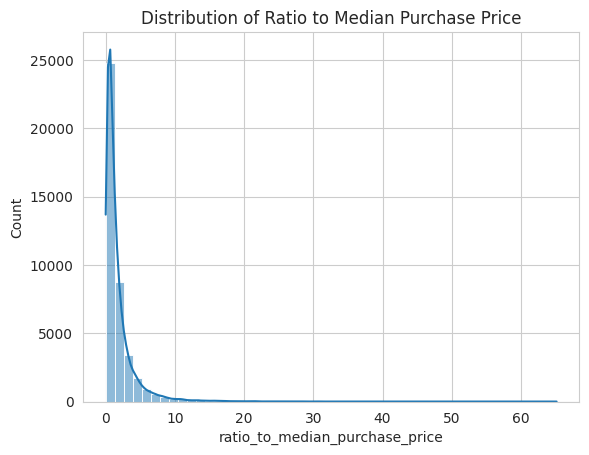

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['ratio_to_median_purchase_price'], bins=50, kde=True)
plt.title("Distribution of Ratio to Median Purchase Price")
plt.show()


In [ ]:
import numpy as np

bins_ratio = [0, 0.5, 1, 2, 5, np.inf]
labels_ratio = [
    "<0.5",
    "0.5–1",
    "1–2",
    "2–5",
    "5+"
]


In [ ]:
df['ratio_to_median_purchase_price_bin'] = pd.cut(
    df['ratio_to_median_purchase_price'],
    bins=bins_ratio,
    labels=labels_ratio,
    include_lowest=True
)


In [ ]:
df['ratio_to_median_purchase_price_bin'].value_counts().sort_index()


,count
ratio_to_median_purchase_price_bin,
<0.5,10931
0.5–1,9748
1–2,9781
2–5,7957
5+,2825


Relationship With Target (fraud)

In [ ]:
df.groupby('ratio_to_median_purchase_price_bin')['fraud'].agg(['count', 'mean'])


/tmp/ipython-input-18517951.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ratio_to_median_purchase_price_bin')['fraud'].agg(['count', 'mean'])


,count,mean
ratio_to_median_purchase_price_bin,,
<0.5,10931,0.027628
0.5–1,9748,0.025031
1–2,9781,0.027400
2–5,7957,0.130577
5+,2825,0.621239


## Ratio to Median Purchase Price (`ratio_to_median_purchase_price`)

### Purpose of Analysis

To determine whether deviations from a customer’s typical spending amount are associated with fraud.

### Observations

- The distribution is **highly right-skewed**, with most values clustered around 1 (normal spending behavior).
- Transactions within normal spending ranges (ratio < 2) show **low fraud rates (~2–3%)**.
- Fraud probability increases sharply for higher ratios:
    - Ratio 2–5 → ~13% fraud
    - Ratio >5 → **~62% fraud**

### Key Insight

> Transactions that significantly exceed a customer’s usual spending behavior are strongly associated with fraud.
>

In [ ]:
df['used_chip'].value_counts()


,count
used_chip,
0.0,26725
1.0,14517


In [ ]:
df.groupby('used_chip')['fraud'].agg(['count', 'mean'])


,count,mean
used_chip,,
0.0,26725,0.100842
1.0,14517,0.062892


Transactions where chip authentication is used exhibit a significantly lower fraud rate compared to non-chip transactions, indicating chip-based payments as a strong fraud-reducing factor.

In [ ]:
df['used_pin_number'].value_counts()
df.groupby('used_pin_number')['fraud'].agg(['count', 'mean'])

,count,mean
used_pin_number,,
0.0,37022,0.097050
1.0,4220,0.003555


PIN adds an extra authentication layer → should reduce fraud.


In [ ]:
df['online_order'].value_counts()
df.groupby('online_order')['fraud'].agg(['count', 'mean'])

,count,mean
online_order,,
0.0,14416,0.012001
1.0,26826,0.128047


Online transactions lack physical verification → higher fraud risk.

In [ ]:
df['repeat_retailer'].value_counts()
df.groupby('repeat_retailer')['fraud'].agg(['count', 'mean'])


,count,mean
repeat_retailer,,
0.0,4733,0.088105
1.0,36509,0.087403


Repeat Retailer vs Fraud — EDA Insight

Analysis of repeat retailer behavior shows minimal difference in fraud rates between repeat and non-repeat merchants. This suggests that merchant familiarity alone does not significantly influence fraud occurrence in the dataset.

In [ ]:
corr = df[
    [
        'distance_from_home',
        'distance_from_last_transaction',
        'ratio_to_median_purchase_price',
        'fraud'
    ]
].corr()

corr


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
distance_from_home,1.000000,-0.005554,0.001270,0.183287
distance_from_last_transaction,-0.005554,1.000000,-0.002277,0.105734
ratio_to_median_purchase_price,0.001270,-0.002277,1.000000,0.462283
fraud,0.183287,0.105734,0.462283,1.000000


Correlation Matrix

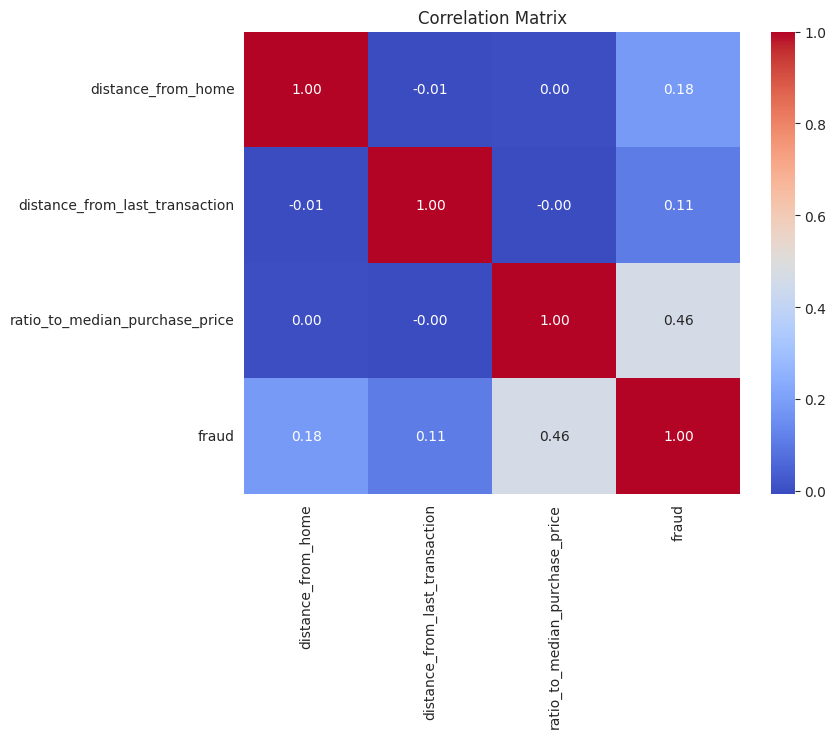

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Correlation Analysis — EDA Insight

Correlation analysis reveals that the ratio to median purchase price has the strongest positive association with fraud, while distance-based features exhibit weaker linear relationships. Low inter-feature correlations indicate minimal redundancy, supporting the inclusion of all numerical variables for downstream modeling.





People who spend much more than usual are much more likely to commit fraud

Being far from home increases fraud risk a little

Sudden location jumps also increase risk a little

These three things are mostly independent of each other (they capture different behaviors)

In [ ]:
df.shape


(13747, 8)

Sweetviz Automatic Report

In [ ]:
!pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 85.8 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
import pandas as pd

In [ ]:
df['fraud'].isna().sum()



np.int64(1)

In [ ]:
df = df.dropna(subset=['fraud'])


In [ ]:
df['fraud'].isna().sum()


np.int64(0)

In [ ]:
!pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 

In [ ]:
import pandas as pd
import sweetviz as sv

df = pd.read_csv("card_transdata.csv")
df = df.dropna(subset=['fraud'])

report = sv.analyze(df, target_feat='fraud')
report.show_html("sweetviz_fraud_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_fraud_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.groupby(['online_order', pd.cut(df['distance_from_home'], bins=[0,10,50,100,500,df['distance_from_home'].max()])])['fraud'].mean()


/tmp/ipython-input-463609706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['online_order', pd.cut(df['distance_from_home'], bins=[0,10,50,100,500,df['distance_from_home'].max()])])['fraud'].mean()


online_order  distance_from_home
0.0           (0.0, 10.0]           0.013296
              (10.0, 50.0]          0.001606
              (50.0, 100.0]         0.001384
              (100.0, 500.0]        0.106163
              (500.0, 4601.011]     0.075000
1.0           (0.0, 10.0]           0.102313
              (10.0, 50.0]          0.099113
              (50.0, 100.0]         0.093698
              (100.0, 500.0]        0.620825
              (500.0, 4601.011]     0.589958
Name: fraud, dtype: float64

For online vs offline transactions, check how fraud rate changes as distance from home increases.

In [ ]:
df.groupby(
    [
        'online_order',
        pd.cut(
            df['distance_from_last_transaction'],
            bins=[0, 1, 5, 10, 50, df['distance_from_last_transaction'].max()]
        )
    ]
)['fraud'].mean()


/tmp/ipython-input-696850631.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


online_order  distance_from_last_transaction
0.0           (0.0, 1.0]                        0.011113
              (1.0, 5.0]                        0.010601
              (5.0, 10.0]                       0.011048
              (10.0, 50.0]                      0.009185
              (50.0, 2160.5]                    0.127536
1.0           (0.0, 1.0]                        0.118924
              (1.0, 5.0]                        0.117782
              (5.0, 10.0]                       0.120789
              (10.0, 50.0]                      0.119816
              (50.0, 2160.5]                    0.674809
Name: fraud, dtype: float64

For online vs offline transactions, check how fraud rate changes as distance from last transaction increases.

In [ ]:
df.groupby(
    [
        'used_chip',
        pd.cut(
            df['distance_from_home'],
            bins=[0, 10, 50, 100, 500, df['distance_from_home'].max()]
        )
    ]
)['fraud'].mean()


/tmp/ipython-input-771940218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


used_chip  distance_from_home
0.0        (0.0, 10.0]           0.075393
           (10.0, 50.0]          0.068159
           (50.0, 100.0]         0.063293
           (100.0, 500.0]        0.630409
           (500.0, 4601.011]     0.616379
1.0        (0.0, 10.0]           0.064096
           (10.0, 50.0]          0.058628
           (50.0, 100.0]         0.057255
           (100.0, 500.0]        0.103102
           (500.0, 4601.011]     0.055118
Name: fraud, dtype: float64

chip usage reduces fraud even at higher distances from home

In [ ]:
df.groupby(
    [
        'used_chip',
        pd.cut(
            df['distance_from_last_transaction'],
            bins=[0, 10, 50, 100, 500, df['distance_from_last_transaction'].max()]
        )
    ]
)['fraud'].mean()


/tmp/ipython-input-734406847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


used_chip  distance_from_last_transaction
0.0        (0.0, 10.0]                       0.091757
           (10.0, 50.0]                      0.091454
           (50.0, 100.0]                     0.641488
           (100.0, 500.0]                    0.631188
           (500.0, 2160.5]                   0.555556
1.0        (0.0, 10.0]                       0.061555
           (10.0, 50.0]                      0.060651
           (50.0, 100.0]                     0.191441
           (100.0, 500.0]                    0.212963
           (500.0, 2160.5]                   0.090909
Name: fraud, dtype: float64

Bivariate analysis between distance from last transaction and chip usage shows that fraud risk increases sharply for large transaction gaps when the card chip is not used. However, when chip-based authentication is present, the increase in fraud probability is significantly mitigated, highlighting the importance of security mechanisms in reducing fraud during abnormal transaction patterns.

In [ ]:
df.groupby(
    [
        'used_pin_number',
        pd.cut(
            df['ratio_to_median_purchase_price'],
            bins=[0, 0.5, 1, 2, 5, df['ratio_to_median_purchase_price'].max()]
        )
    ]
)['fraud'].mean()


/tmp/ipython-input-3064749748.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


used_pin_number  ratio_to_median_purchase_price
0.0              (0.0, 0.5]                        0.027296
                 (0.5, 1.0]                        0.027446
                 (1.0, 2.0]                        0.028681
                 (2.0, 5.0]                        0.142551
                 (5.0, 266.69]                     0.693373
1.0              (0.0, 0.5]                        0.000000
                 (0.5, 1.0]                        0.000000
                 (1.0, 2.0]                        0.000000
                 (2.0, 5.0]                        0.002963
                 (5.0, 266.69]                     0.031700
Name: fraud, dtype: float64

analysis between PIN usage and transaction amount deviation shows that fraud probability increases sharply for high-value transactions when a PIN is not used. However, when PIN authentication is present, fraud rates remain extremely low even for unusually large purchases.

Define features & target

In [ ]:
X = df[
    [
        'distance_from_home',
        'distance_from_last_transaction',
        'ratio_to_median_purchase_price',
        'used_chip',
        'used_pin_number',
        'online_order',
        'repeat_retailer'
    ]
]

y = df['fraud']



In [ ]:
X.isna().sum()



,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
used_chip,1
used_pin_number,1
online_order,1
repeat_retailer,1


In [ ]:
binary_cols = ['used_chip', 'used_pin_number', 'online_order', 'repeat_retailer']

for col in binary_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)


/tmp/ipython-input-1541844688.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
/tmp/ipython-input-1541844688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mode()[0], inplace=True)


In [ ]:
X.isna().sum()


,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
used_chip,0
used_pin_number,0
online_order,0
repeat_retailer,0


In [ ]:
y.isna().sum()


np.int64(1)

In [ ]:
y.fillna(y.mode()[0], inplace=True)

In [ ]:
y.isna().sum()


np.int64(0)

split dataset into test and tran (70:30 ) ratio

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


using logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


for test dataset


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9595036980156004
ROC-AUC: 0.968112607128468
[[44901   280]
 [ 1724  2581]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     45181
         1.0       0.90      0.60      0.72      4305

    accuracy                           0.96     49486
   macro avg       0.93      0.80      0.85     49486
weighted avg       0.96      0.96      0.96     49486



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]


for the train dataset


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))


Train Accuracy: 0.9585245873244072
Train ROC-AUC: 0.9668862579506686
Train Confusion Matrix:
 [[104723    697]
 [  4092   5954]]
Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    105420
         1.0       0.90      0.59      0.71     10046

    accuracy                           0.96    115466
   macro avg       0.93      0.79      0.85    115466
weighted avg       0.96      0.96      0.95    115466



Finding out the Important feature columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_scaled, y)


LogisticRegression(max_iter=1000)

In [ ]:
import pandas as pd
import numpy as np

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0],
    'Absolute_Coefficient': np.abs(lr.coef_[0])
})

feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)


,Feature,Coefficient,Absolute_Coefficient
4,used_pin_number,-4.051502,4.051502
5,online_order,3.219410,3.219410
2,ratio_to_median_purchase_price,2.470808,2.470808
0,distance_from_home,0.957387,0.957387
1,distance_from_last_transaction,0.563296,0.563296
3,used_chip,-0.503968,0.503968
6,repeat_retailer,-0.181700,0.181700


GridSearch for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


Initialize Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)


Apply GridSearchCV

In [ ]:
grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)


Fit on TRAIN data only

In [ ]:
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC: 0.9750745615302302


In [ ]:
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tuned))
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Accuracy: 0.9437820797801398
ROC-AUC: 0.976510816308573
[[44823   358]
 [ 2424  1881]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     45181
         1.0       0.84      0.44      0.57      4305

    accuracy                           0.94     49486
   macro avg       0.89      0.71      0.77     49486
weighted avg       0.94      0.94      0.94     49486

